In [1]:
import os
import sys
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt

# Bootstrapped iterative Boruta

In [3]:
def mergeDictionary(dict_all, dict_2):
    for key, value in dict_2.items():
        if key in dict_all and key in dict_2:
            dict_all[key].append(dict_2[key])
        else:
            dict_all[key] = [dict_2[key]]
    return dict_all

/tmp/ipykernel_2038319/1443042742.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df[0],rotation=90)


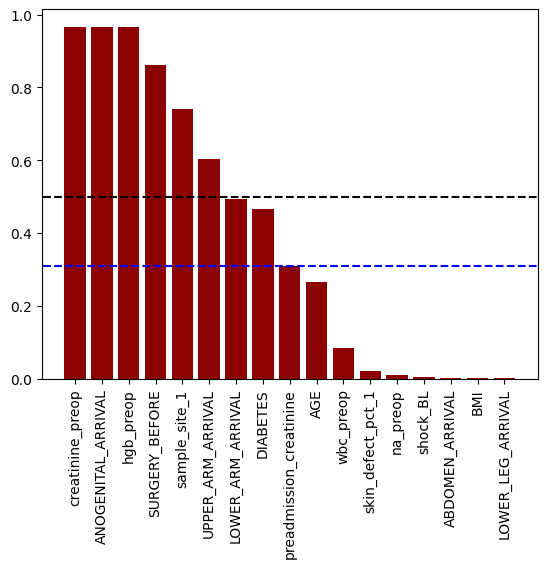

,0,1
2,creatinine_preop,0.966667
5,ANOGENITAL_ARRIVAL,0.966667
3,hgb_preop,0.964667
6,SURGERY_BEFORE,0.861333
0,sample_site_1,0.740667
4,UPPER_ARM_ARRIVAL,0.602667
8,LOWER_ARM_ARRIVAL,0.492000
7,DIABETES,0.466000
10,preadmission_creatinine,0.308667
9,AGE,0.264667


In [15]:
''' Load data '''

save_on = True
thresh = 0.3

perc=100
target = "Conclusion_micro"
dataset = "POSTSURGERY"
PATH_out = f"../../results/20_feature_selection/{dataset}/CV"        

dic_all = dict()

n_bootstrap = 30  #40  #34  #26 
for i in range(1,n_bootstrap):
    outname_json=f"{i}__{target}_iterativeBoruta_{perc}perc.json"
    with open(f"{PATH_out}/{outname_json}", "r") as f: dict_iterBoruta = json.load(f)
    dic_all = mergeDictionary(dic_all, dict_iterBoruta)


''' Weight by how often it is found in bootstrap '''
dict_weighedResults = dict()
for key, val in dic_all.items():
    row = np.array(val)
    try: 
        weighted_row = row.mean() * (len(row)/n_bootstrap)
    except TypeError:
        weighted_row = row.mean() * (1/n_bootstrap)
    dict_weighedResults[key] = weighted_row
dict_weighedResults


''' Plot '''
fig, ax = plt.subplots()
df = pd.DataFrame(dict_weighedResults.items()).sort_values(1, ascending=False)
ax.hlines(0.5, -2, 20, linestyles="dashed", color="black")
ax.hlines(0.31, -2, 20, linestyles="dashed", color="blue")
ax.bar(x=df[0], height=df[1], color="darkred")
ax.set_xticklabels(df[0],rotation=90)
plt.show()



if save_on: 
    ''' Save those above threshold (50%)?'''
    outname=f"{target}_bootstrapped_iterativeBoruta_{perc}perc.txt"
    with open(f"{PATH_out}/{outname}", "w") as f: 
        for key, val in dict_weighedResults.items():
            if val > thresh: 
                f.write(key+"\n")

df
